In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

RAW_PATH = "../data/raw/dataset.csv"
raw_df = pd.read_csv(RAW_PATH)

raw_df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [28]:
print("Shape:", raw_df.shape)
raw_df.info()


Shape: (1000, 21)
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         1000 non-null   str  
 1   duration                1000 non-null   int64
 2   credit_history          1000 non-null   str  
 3   purpose                 1000 non-null   str  
 4   credit_amount           1000 non-null   int64
 5   savings_status          1000 non-null   str  
 6   employment              1000 non-null   str  
 7   installment_commitment  1000 non-null   int64
 8   personal_status         1000 non-null   str  
 9   other_parties           1000 non-null   str  
 10  residence_since         1000 non-null   int64
 11  property_magnitude      1000 non-null   str  
 12  age                     1000 non-null   int64
 13  other_payment_plans     1000 non-null   str  
 14  housing                 1000 non-null   str  
 15  existing_credit

In [31]:
raw_df["class"].value_counts()


class
good    700
bad     300
Name: count, dtype: int64

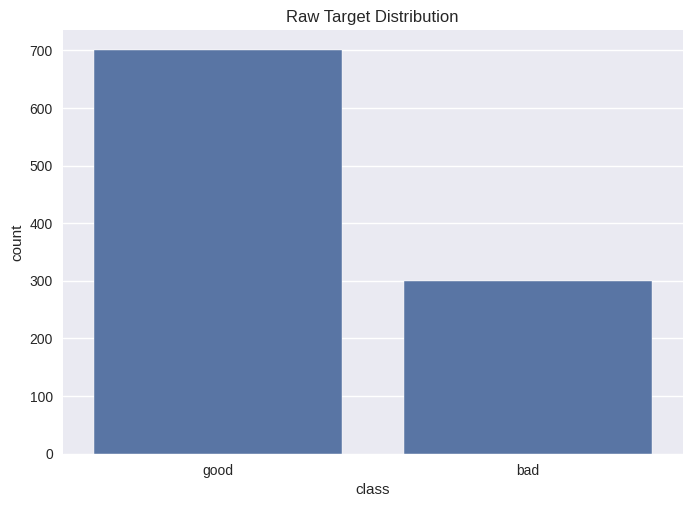

In [32]:
sns.countplot(x="class", data=raw_df)
plt.title("Raw Target Distribution")
plt.show()


In [35]:
raw_df.isnull().sum().sort_values(ascending=False)


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [37]:
raw_df.describe()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [38]:
PROC_PATH = "../data/processed/final.csv"
proc_df = pd.read_csv(PROC_PATH)

proc_df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
1,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
2,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
3,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad
4,0<=X<200,12,existing paid,new car,1295,<100,<1,3,female div/dep/mar,none,...,car,25,none,rent,1,skilled,1,none,yes,bad


In [39]:
proc_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         702 non-null    str  
 1   duration                702 non-null    int64
 2   credit_history          702 non-null    str  
 3   purpose                 702 non-null    str  
 4   credit_amount           702 non-null    int64
 5   savings_status          702 non-null    str  
 6   employment              702 non-null    str  
 7   installment_commitment  702 non-null    int64
 8   personal_status         702 non-null    str  
 9   other_parties           702 non-null    str  
 10  residence_since         702 non-null    int64
 11  property_magnitude      702 non-null    str  
 12  age                     702 non-null    int64
 13  other_payment_plans     702 non-null    str  
 14  housing                 702 non-null    str  
 15  existing_credits        702 non-nu

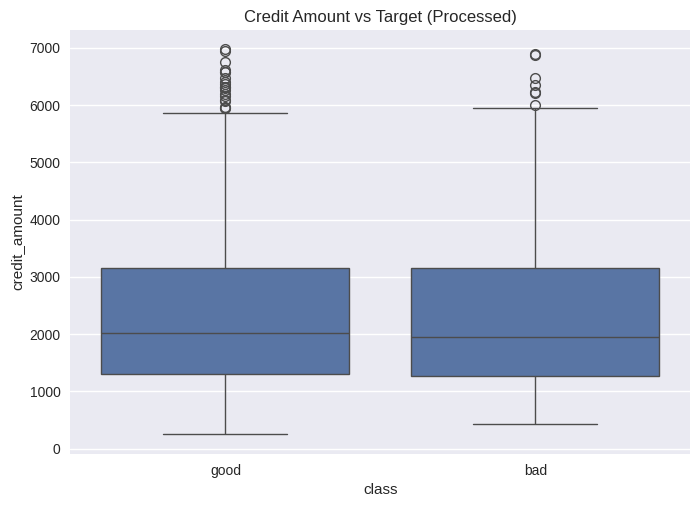

In [41]:
sns.boxplot(x="class", y="credit_amount", data=proc_df)
plt.title("Credit Amount vs Target (Processed)")
plt.show()


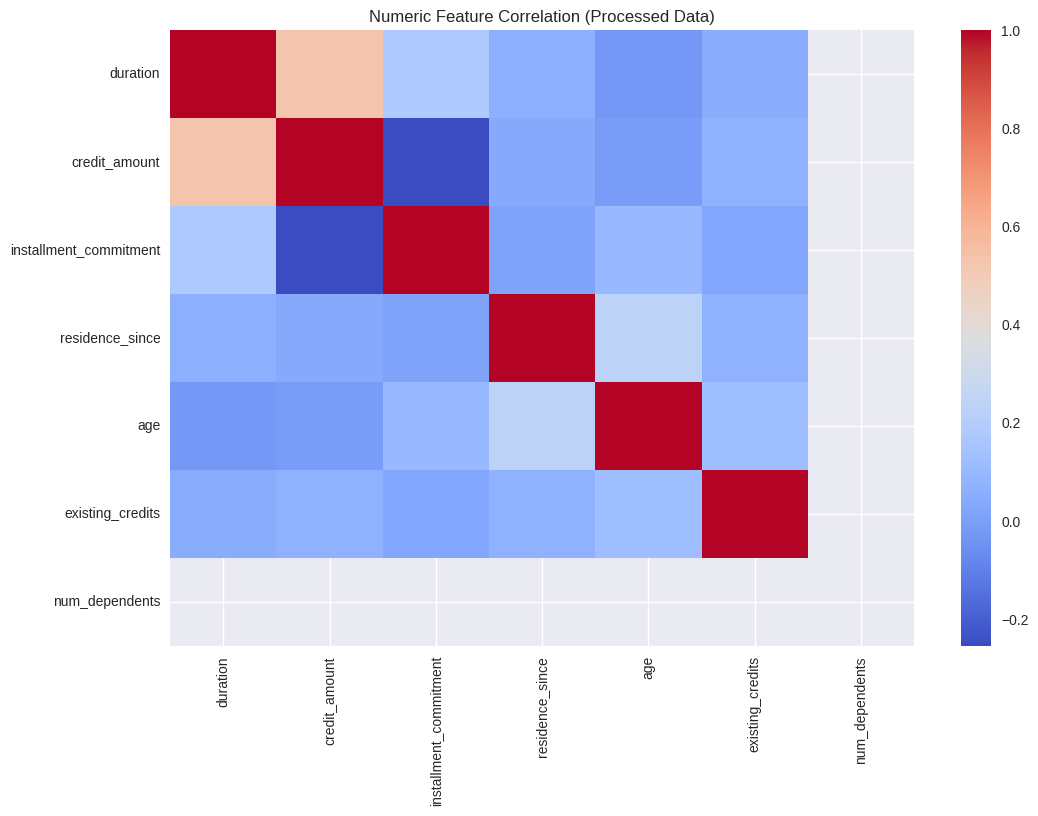

In [45]:
num_df = proc_df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Numeric Feature Correlation (Processed Data)")
plt.show()


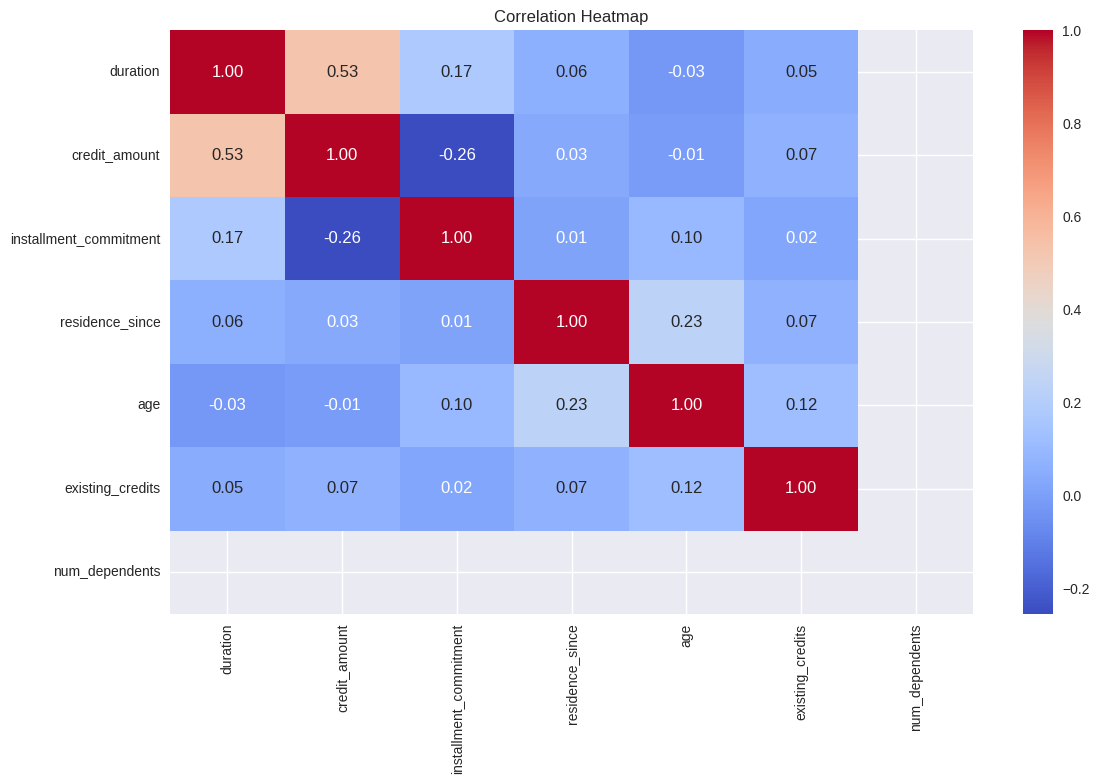

In [46]:
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{IMG_PATH}/correlation.png")
plt.show()


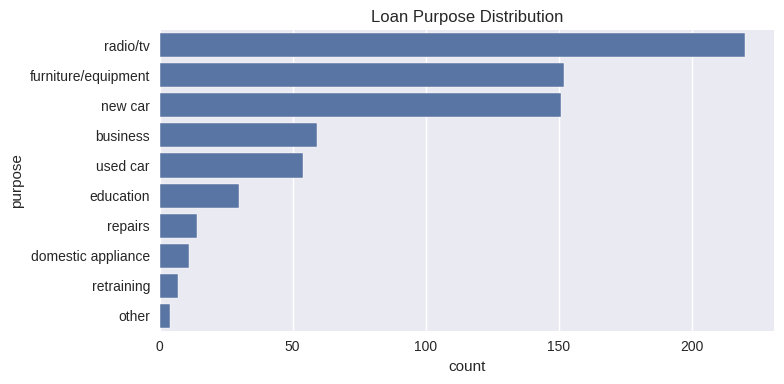

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(y="purpose", data=df, order=df["purpose"].value_counts().index)
plt.title("Loan Purpose Distribution")
plt.tight_layout()
plt.show()


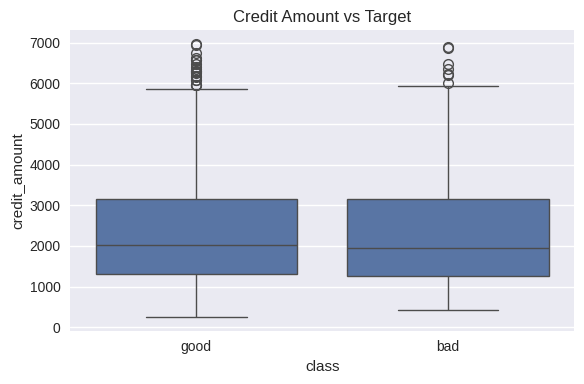

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x="class", y="credit_amount", data=df)
plt.title("Credit Amount vs Target")
plt.tight_layout()
plt.show()


In [49]:
proc_df["class"].value_counts()

class
good    517
bad     185
Name: count, dtype: int64